# Спрос на рейсы авиакомпании



**Цель проекта:** понять предпочтения пользователей, покупающих билеты на разные направления.

**Задача проекта:** изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие фестивали.

**Описание данных:**

*Таблица airports* — информация об аэропортах:

airport_code — трёхбуквенный код аэропорта,

airport_name — название аэропорта,

city — город,

timezone — часовой пояс.

*Таблица aircrafts* — информация о самолётах:

aircraft_code — код модели самолёта,

model — модель самолёта,

range — дальность полётов.

*Таблица ticket* — информация о билетах:

ticket_no — уникальный номер билета,

passenger_id — уникальный идентификатор пассажира,

passenger_name — имя и фамилия пассажира.

*Таблица flights* — информация о рейсах:

flight_id — уникальный идентификатор рейса,

departure_airport — аэропорт вылета,

departure_time — дата и время вылета,

arrival_airport — аэропорт прилёта,

arrival_time — дата и время прилёта,

aircraft_code — уникальный идентификатор самолёта.

*Таблица ticket_flights* — стыковая таблица «рейсы-билеты»:

ticket_no — номер билета,

flight_id — уникальный идентификатор рейса.

*Таблица festivals* — информация о фестивалях:

festival_id — уникальный номер фестиваля,

festival_date — дата проведения фестиваля,

festival_city — город проведения фестиваля,

festival_name — название фестиваля.

**Получим данные**. Напишем парсер для сбора данных с сайта о фестивалях 2018 года. Сохраним данные в датафрейм festivals.

In [1]:
import requests  # Импорт библиотеки для запросов к серверу
from bs4 import (
    BeautifulSoup,
)
URL = '.../festival_news/index.html'
req = requests.get(URL) # GET-запрос
soup = BeautifulSoup(req.text, 'lxml') 
table = soup.find('table',attrs={'id': 'best_festivals'})
heading_table = []
for row in table.find_all('th'):
    heading_table.append(row.text)

content=[]
for row in table.find_all('tr'): 
    if not row.find_all('th'):
        content.append([element.text for element in row.find_all('td')])

import pandas as pd
festivals = pd.DataFrame(content, columns=heading_table) 
festivals

,Название фестиваля,Место проведения,Дата проведения
0,Музыкальный фестиваль «Усадьба Jazz»,Екатеринбург,01.07.2018
1,Фестиваль музыки и технологий Alfa Future People,Нижний Новгород,10.08.2018
2,"Фестиваль еды «О, да! Еда!»",Санкт-Петербург,21.07.2018
3,Доброфест,Ярославль,29.07.2018
4,Park Live,Москва,28.07.2018
5,Пикник Афиши,Москва,04.08.2018
6,VK FEST,Санкт-Петербург,29.07.2018
7,"Фестиваль «О, да! Еда!»",Иркутск,25.08.2018
8,"Фестиваль «О, да! Еда!»",Владивосток,02.09.2018
9,Видфест,Москва,08.09.2018


По заданию заказчика требуется посчитать количество билетов, купленных на рейсы в Москву в период с 23.08.2018 по 30.09.2018. В таблице должен быть номер недели; информация о количестве купленных за неделю билетов; номер недели, если в эту неделю проходил фестиваль, и nan, если не проходил; название фестиваля.

In [2]:
# select 
#     extract (week from f.arrival_time) as week_number, 
#     count(tf.ticket_no) as ticket_amount,
#     extract(week from fest.festival_date) as festival_week, 
#     fest.festival_name as festival_name
# from ticket_flights as tf
# inner join flights as f on f.flight_id = tf.flight_id
# inner join airports as a on a.airport_code = f.arrival_airport
# left join festivals as fest on extract(week from fest.festival_date) = extract(week from f.arrival_time) and fest.festival_city = a.city
# where f.arrival_time::date between '2018-07-23' and '2018-09-30'
# and a.city = 'Москва'
# group by week_number, festival_week, fest.festival_name

**1. Импортирование файлов**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


**2. Изучение данных**

In [ ]:
q1 = pd.read_csv('.../datasets/query_1.csv')
q1

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [ ]:
#проверка типа данных
q1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [ ]:
#числовое описание данных
q1.describe()

,flights_amount
count,8.000000
mean,2035.625000
std,1965.203947
min,300.000000
25%,605.250000
50%,795.000000
75%,4250.250000
max,4557.000000


In [ ]:
#проверка на пропуски
q1.isna().sum()

model             0
flights_amount    0
dtype: int64

In [ ]:
#проверка на дубликаты
q1.duplicated().sum()

0

In [ ]:
#Все те же проверки проведем для ДФ q3
q3 = pd.read_csv('.../datasets/query_3.csv')
q3

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
...,...,...
96,Чита,1.580645
97,Элиста,4.870968
98,Южно-Сахалинск,4.290323
99,Якутск,2.741935


In [ ]:
q3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city             101 non-null    object 
 1   average_flights  101 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [ ]:
q3.describe()

,average_flights
count,101.000000
mean,5.494189
std,13.119790
min,1.000000
25%,2.000000
50%,3.000000
75%,5.870968
max,129.774194


In [ ]:
q3.isna().sum()

city               0
average_flights    0
dtype: int64

In [ ]:
q3.duplicated().sum()

0

Мы изучили данные, которые состоят из двух датасетов. Тип данных и название столбцов менять не требуется, пропущенных значений и дубликатов нет. Можно перейти к исследовательскому анализу.


**Топ-10 городов по количеству рейсов**

In [ ]:
top10 = q3.sort_values(by='average_flights', ascending=False).head(10)
top10

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612903
84,Ульяновск,9.580645


Мы получили список городов, первую десятку по среднему количеству рейсов в день за август 2018 в порядке убывания. Москва, Санкт-Петербург и Новосибирск являются лидерами, причем среднее количество рейсов в Москве превышает в 4 раза среднее количество рейсов в Петербурге,в Новосибирск летает почти в 2 раза меньше рейсов, чем в Санкт-Петербург.

 Визуализируем данные:


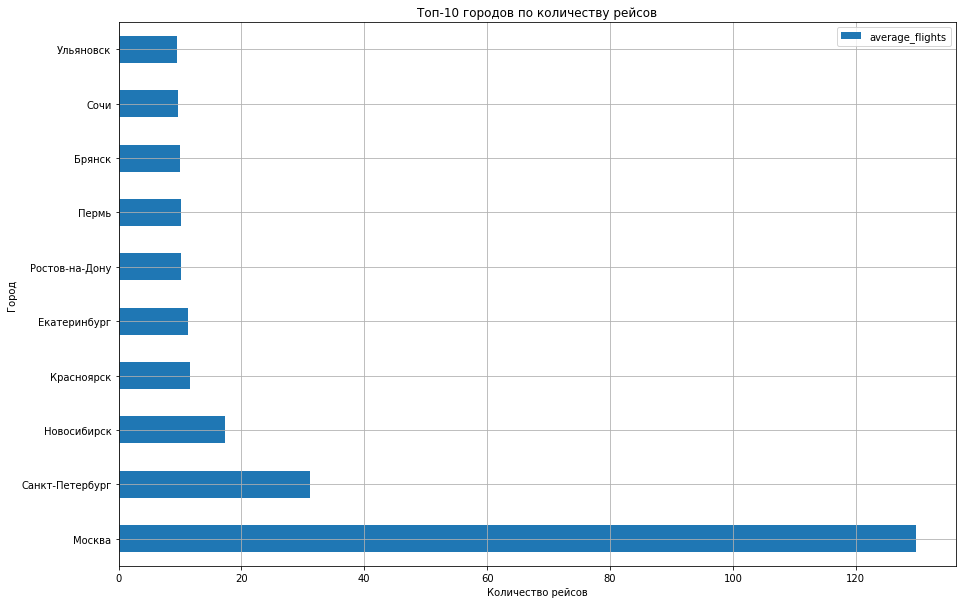

In [ ]:
top10.plot(kind = 'barh', x='city', y='average_flights', grid=True, figsize=(15,10), title = 'Топ-10 городов по количеству рейсов')
plt.xlabel('Количество рейсов')
plt.ylabel('Город')
plt.show()

Мы видим, что остальные города, не вошедшие в тройку лидеров, показывают примерно одинаковое среднее количество рейсов, прибывающих в день за август 2018 года, от 9,5 до 11,5.

**Построение графиков: модели самолетов и количество рейсов, города и количество рейсов**

In [ ]:
#отсортируем данные для моделей по количеству рейсов
models = q1.sort_values(by='flights_amount', ascending=False)
models

,model,flights_amount
6,Cessna 208 Caravan,4557
5,Bombardier CRJ-200,4446
7,Sukhoi SuperJet-100,4185
1,Airbus A321-200,960
2,Boeing 737-300,630
0,Airbus A319-100,607
3,Boeing 767-300,600
4,Boeing 777-300,300


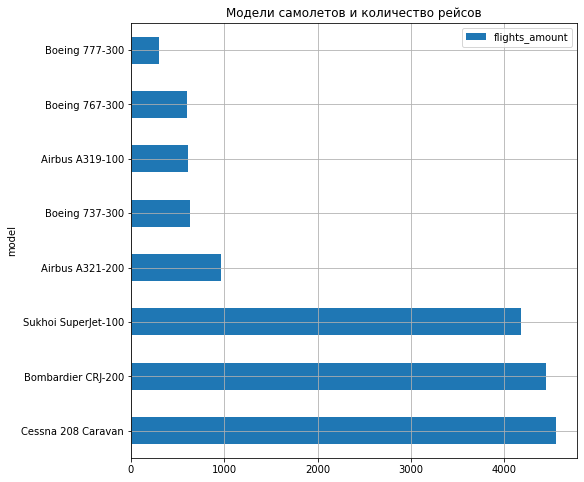

In [ ]:
#построим график
models.plot(x='model', y='flights_amount', kind='barh', grid=True, figsize=(8, 8), title='Модели самолетов и количество рейсов')
plt.show()

Самое большое количество рейсов в сентябре 2018, более 4000, совершалось на самолетах моделей Cessna 208 Caravan, Bombardier CRJ-200 и Sukhoi SuperJet-100. 
Примечательно то, что Cessna  - самолет малой авиации, перевозяций всего 9 пассажиров. Неприхотливый в эксплуатации, простотой в пилотировании, является высокотехнологичным решением для развития частной авиации в России.

Можно понять популярность модели Bombardier CRJ-200, этот экономичный скоростной самолет способен выполнять полёты в сложных метеорологических условиях и в условиях высокогорных аэродромов. 
 
Несмотря на проблемы с эксплуатацией и высокой стоимостью полетов, Sukhoi SuperJet-100 на сентябрь 2018 еще оставался в тройке лидеров. Предполагаем, что это связано с тем, что данные модели производились в достаточных количествах и выполняли полеты у российских и зарубежных авиакомпаний.

In [ ]:
#отсортируем данные по городам по среднему количеству полетов
cities = q3.sort_values(by='average_flights', ascending=False)
cities

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
...,...,...
22,Ижевск,1.000000
65,Петропавловск-Камчатский,1.000000
31,Комсомольск-на-Амуре,1.000000
58,Нягань,1.000000


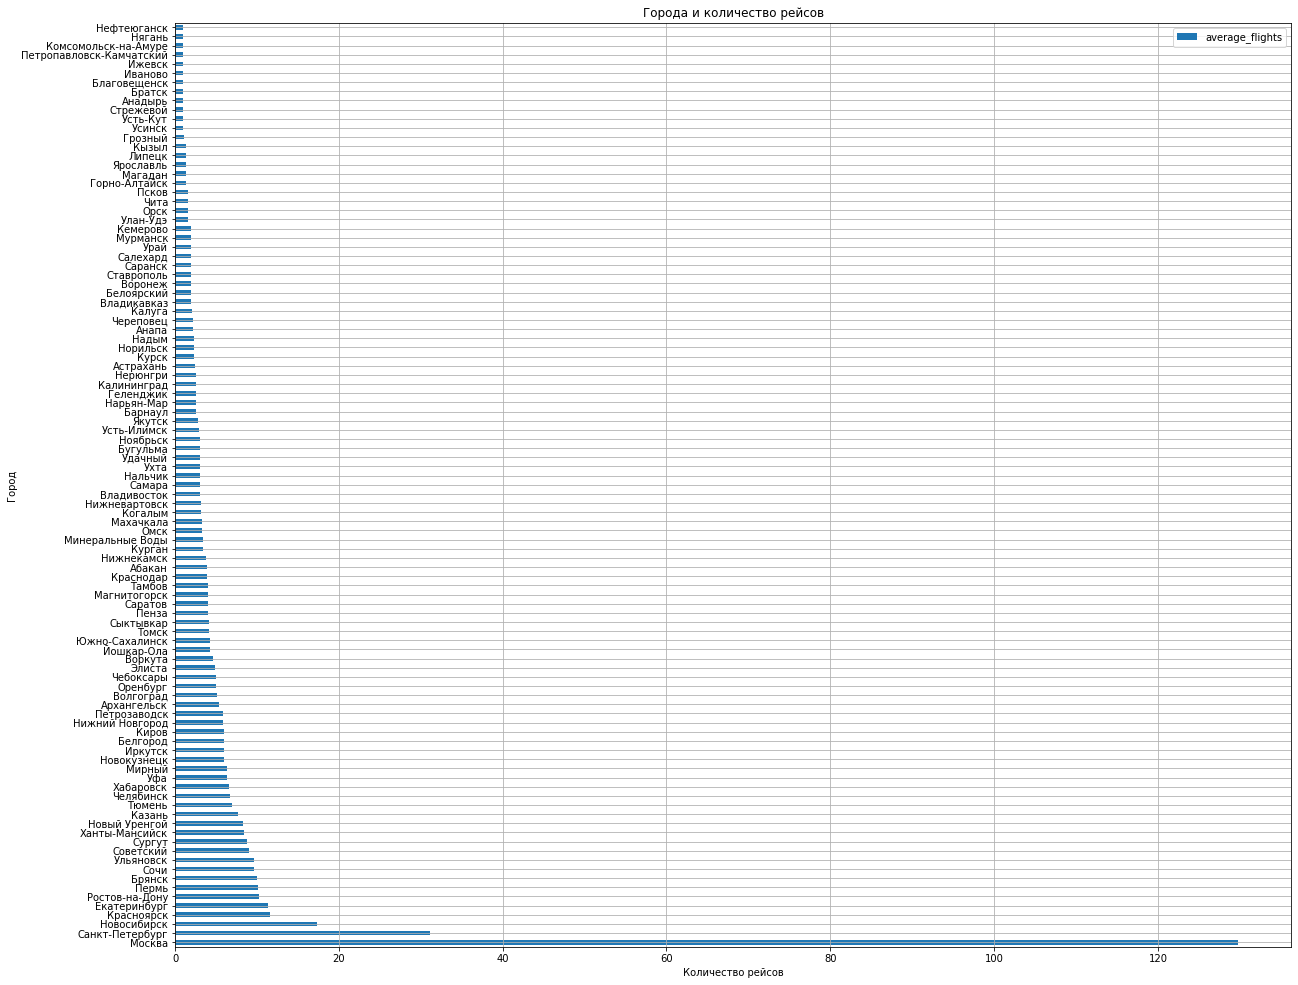

In [ ]:
#построим визуализацию данных для всех представленных в ДФ городов
cities.plot(kind = 'barh', x='city', y='average_flights', grid=True, figsize=(20,17), title = 'Города и количество рейсов')
plt.xlabel('Количество рейсов')
plt.ylabel('Город')
plt.show()

Мы уже выявили топ самых популярных городов для полетов. На графике можно увидеть распределения числа рейсов по городам, среди них самыми малопосещаемыми за рассматриваемый период оказались далекие от центральной России: Нефтеюганск, Нягань, Комсомольск-на-Амуре.

**Общий вывод**

В ходе проведенного исследования мы изучили данные, которые состояли из двух датасетов. Данные были чистыми, без пропусков, дубликатов, приведенные к нужному типу.

Топ-3 модели самолёта в сентябре 2018 года по количеству полетов - Cessna 208 Caravan, Bombardier CRJ-200 и Sukhoi SuperJet-100. На остальных моделях не совершилось и 1000 рейсов в месяц.

В топ-10 городов по количеству совершаемых рейсов первую строчку занимает Москва, далее идет с отрывом более, чем в 4 раза  Санкт-Петербург, в Новосибирск совершается почти в 2 раза меньше рейсов,  чем в Санкт-Петербург. Остальные города, не вошедшие в тройку лидеров, показывают примерно одинаковое среднее количество рейсов, прибывающих в день за август 2018 года, от 9,5 до 11,5.
 
Как мы выяснили в первой части исследования, спрос пассажиров на рейсы в города, где проходят крупнейшие фестивали, не растет. Для проведения статистического анализа мы не располагаем достаточным количеством данных.
